### Develop a classification model for titanic survival prediction.
1. Download the data from [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data) and perform the following operations.
2. EDA (Univariate, Multivariate, KDE, Pearson Correlation)
3.  Data Preprocessing (Imputation, create at least 2 new features)
4.  Cross-validation
5.  Use ROC curve, Precision/Recall for the model's metric (NOT ALLOWED TO USE ACCURACY)
6.  An inference pipeline consisting of Data Preprocessing and prediction.
7. Note: It is mandatory to plot each graph and write an observation about it. Plot without title, x-label and y-label won't be accepted. 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### lets load the dataset 

In [3]:
df = pd.read_csv(r'D:\aneeketj_study\Data Science\LU_Mentoring_Sessions\Projects\002 Titanic Dataset\titanic\train.csv')

### Lets go for primary analysis 

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Primary analysis:
    We have total 11 features in the dataset
### Categorical
    Survived
    Pclass
    Sex
    SibSp
    Parch
    Embarked
### Numerical
    Age
    Fare
    PassengerId
### String
    Name
    Ticket
    Cabin  

### Lets check if there are any duplicate entries

In [7]:
df.duplicated().sum()

0

### There are no duplicat entries in the dataset

## Lets us now check for the null values

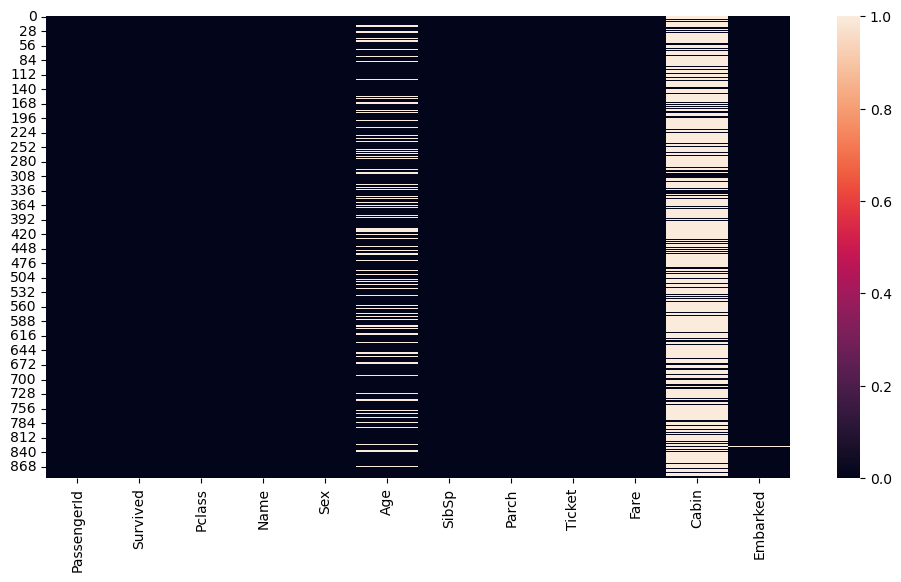

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

##  We can see that there are null values in "Age" and "Cabin" 
### lets check what is exact count of missing values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
(df['Age'].isnull().sum()/891)*100

19.865319865319865

In [18]:
(df['Cabin'].isnull().sum()/891)*100

77.10437710437711

     There are 
        177 (around 20%) missing values in Age
        687 (more than 70%)missing values in Cabin
        2 missing values in Embarked 

###     More than 70% missing values in cabin --- Drop this column

In [19]:
df.drop(columns=['Cabin'], inplace = True)

### Age is a numerical column, hence null values of this has to be taken care by statastical means

In [20]:
# In Age we can replace the missing values with mean 

df['Age'].fillna(df['Age'].mean(), inplace = True)

### Lets now check with the 'Embarked' column

In [21]:
# its a categorical data, we should replace it with the data with maximun repetations

df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# S has the maximum occurance, lets replace null values with S

df['Embarked'].fillna('S', inplace =True)

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
# lets change type of categorical data to category

df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.8+ KB


In [26]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


## Univariate Analysis

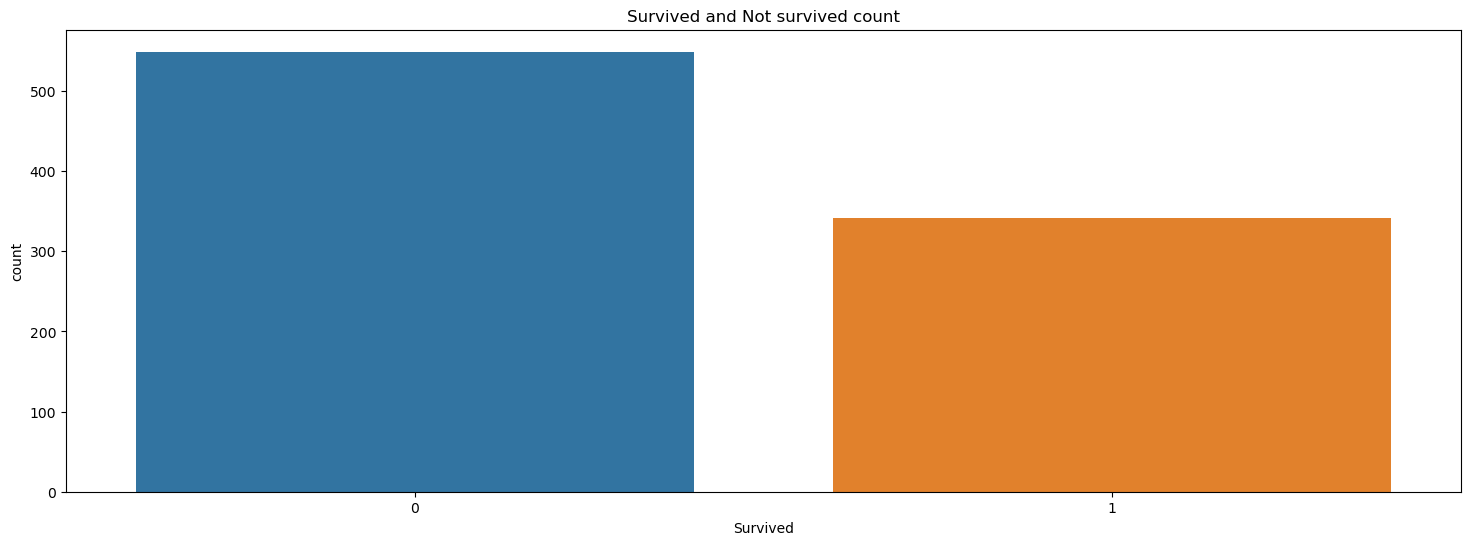

In [70]:
plt.figure(figsize=(18,6))
sns.countplot(df['Survived']).set(title = 'Survived and Not survived count')
plt.show()

In [38]:
survive = (df['Survived'].value_counts().values[1]/891)*100
survive

38.38383838383838

#### Observation
    Around 39 % people survived in the accident and 61% people died in the accident 

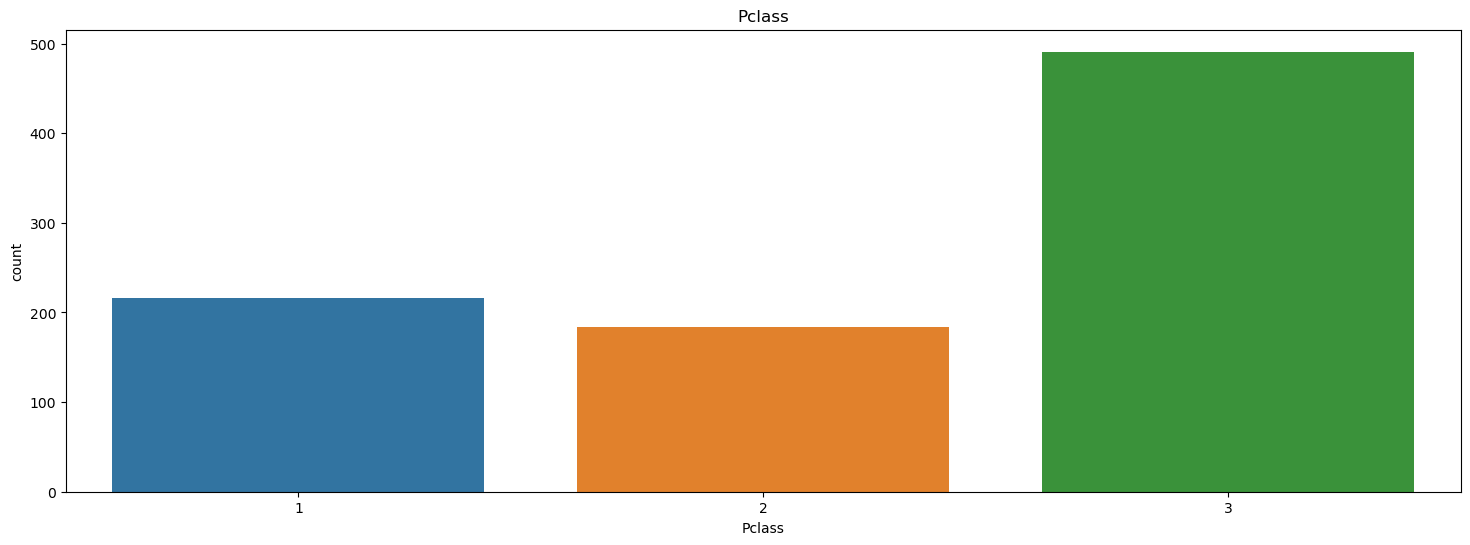

In [69]:
plt.figure(figsize=(18,6))
sns.countplot(df['Pclass']).set(title = 'Pclass')
plt.show()

In [41]:
print((df['Pclass'].value_counts()/891)*100)

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


#### Observation: More number of Passengers were from class 3
    55% people are in class 3
    24% people are in class 2
    21% people are in class 1

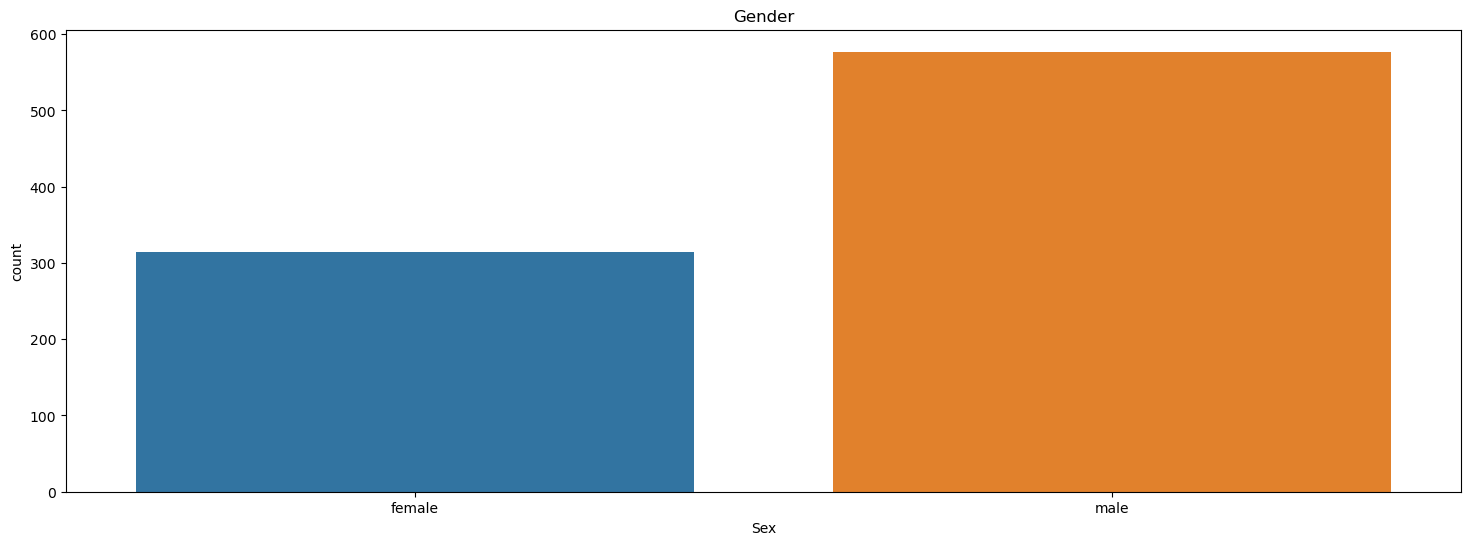

In [68]:
plt.figure(figsize=(18,6))
sns.countplot(df['Sex']).set(title = 'Gender')
plt.show()

In [43]:
print((df['Sex'].value_counts()/891)*100)

male      64.758698
female    35.241302
Name: Sex, dtype: float64


#### Observation: Male passenger count is comparatively high than female
    65 % male 
    35 % Female

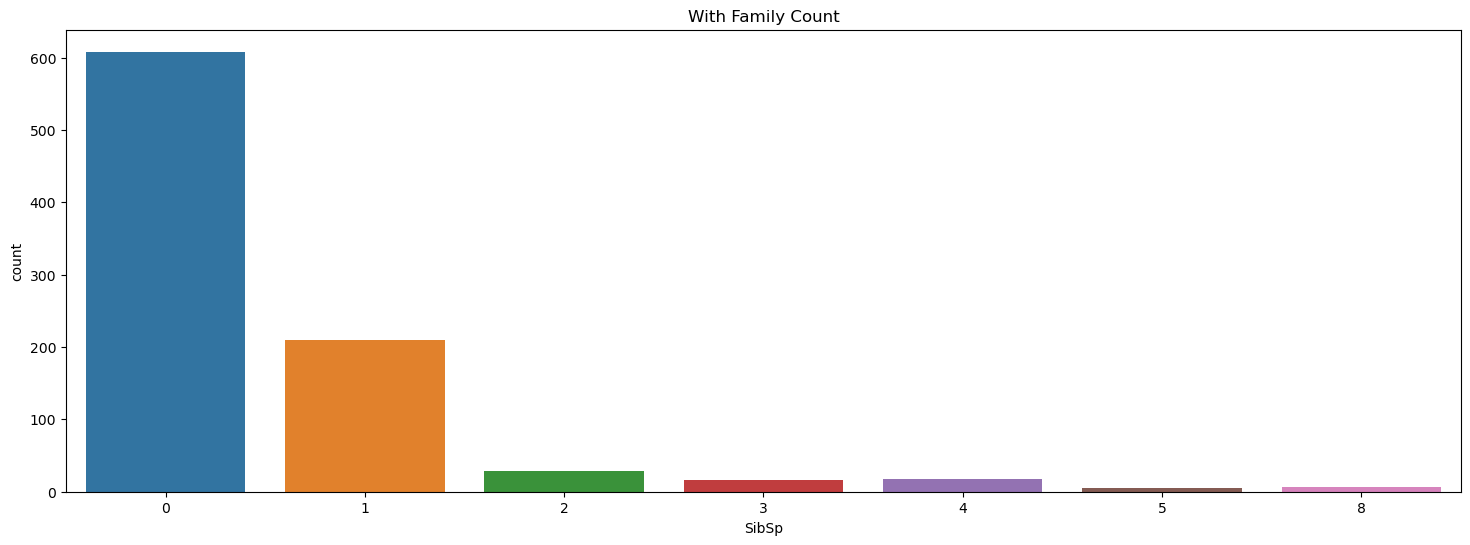

In [67]:
plt.figure(figsize=(18,6))
sns.countplot(df['SibSp']).set(title = 'With Family Count')
plt.show()

In [49]:
print (df['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


#### Most of the passenger were without family/ single 

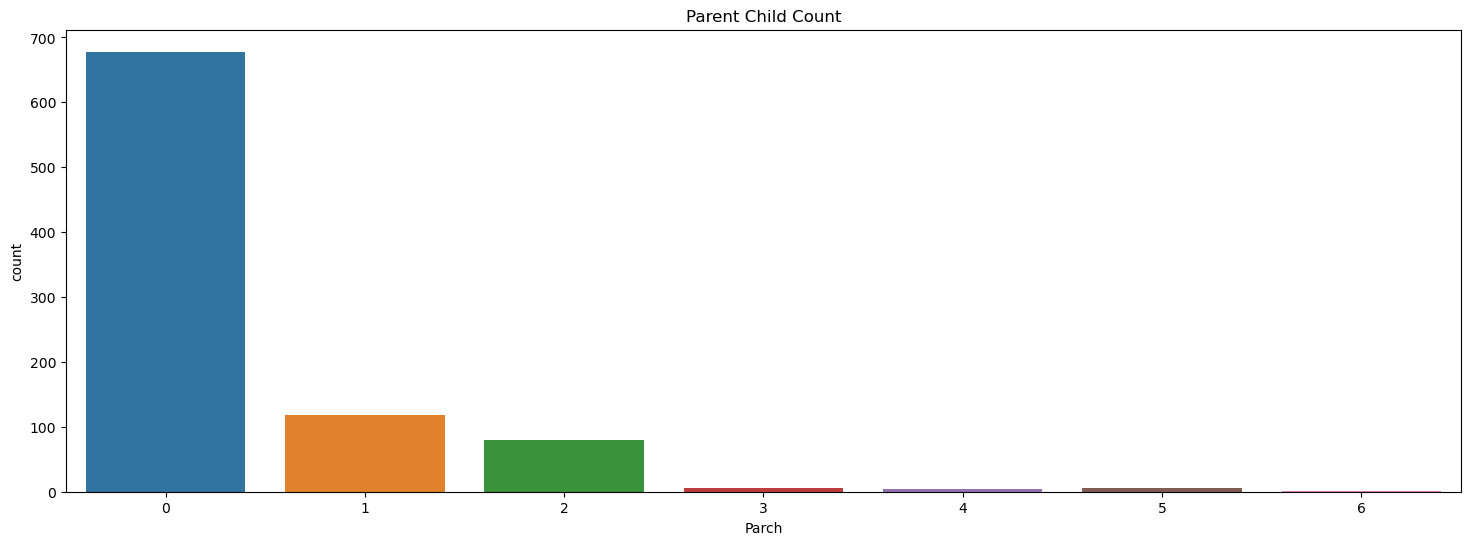

In [66]:
plt.figure(figsize=(18,6))
sns.countplot(df['Parch']).set(title = 'Parent Child Count')
plt.show()

In [270]:
print ((df['Parch'].value_counts()/891)*100)

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


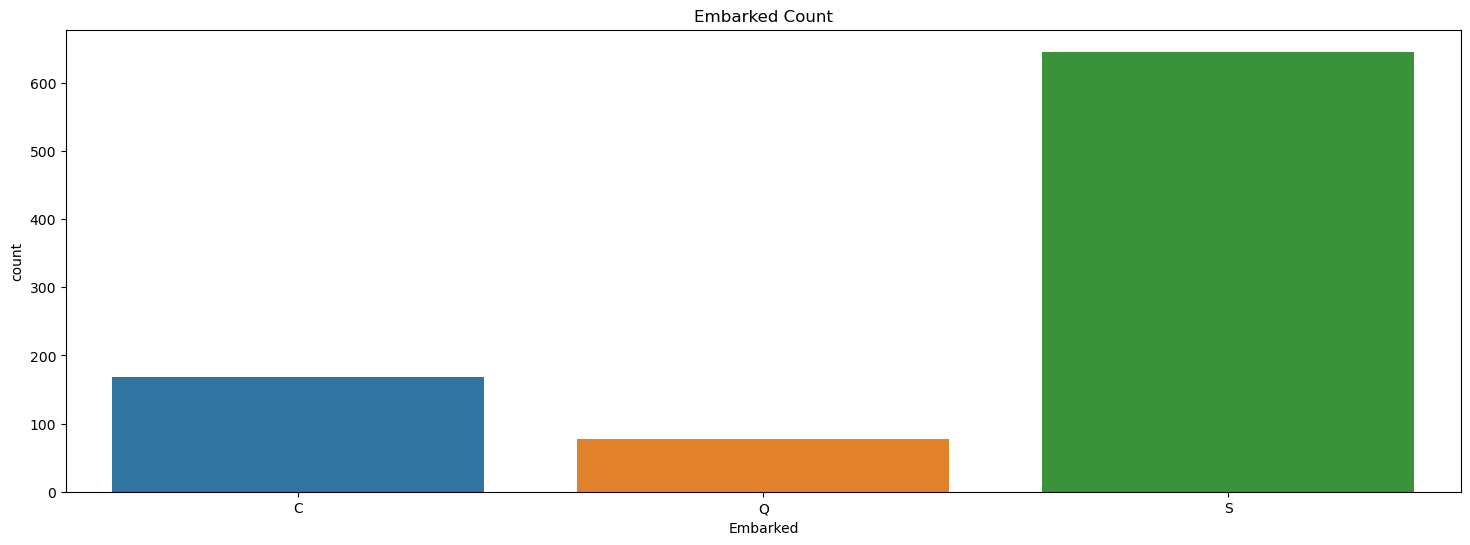

In [65]:
plt.figure(figsize=(18,6))
sns.countplot(df['Embarked']).set(title = 'Embarked Count')
plt.show()

In [53]:
print ((df['Embarked'].value_counts()/891)*100)

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


#### 
    73 % passenger were travelling to New York
    19 % passenger were travelling to Cherbourg
    9 % passenger were travelling to Queenstown

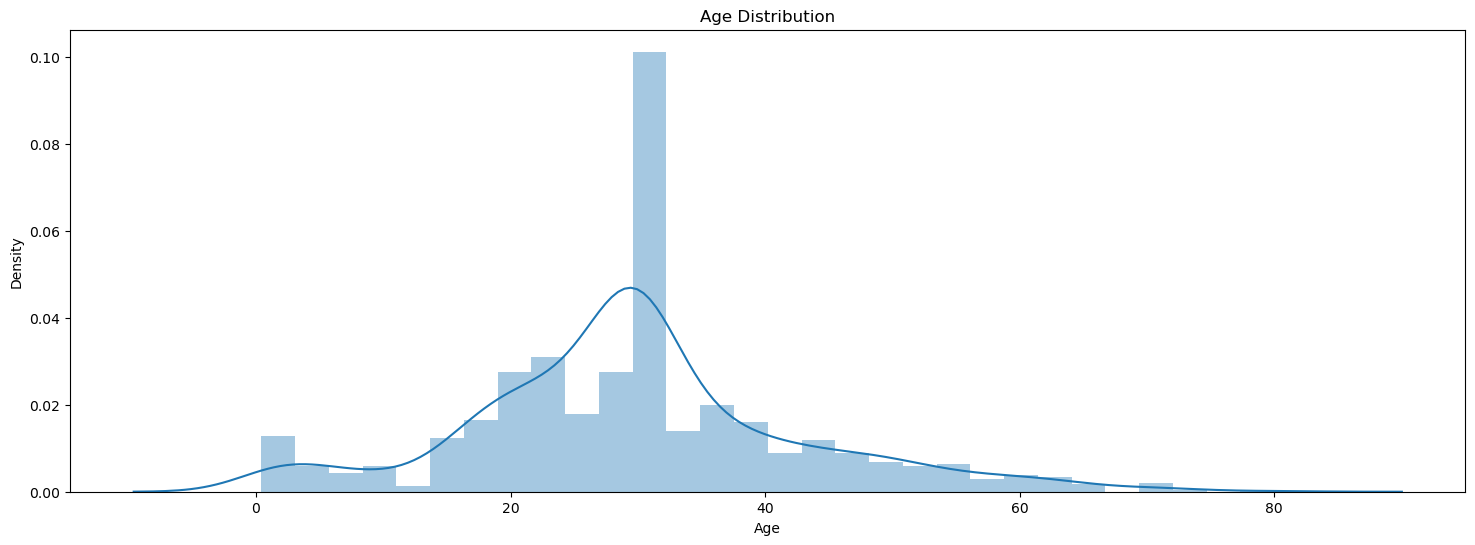

In [64]:
plt.figure(figsize=(18,6))
sns.distplot(df['Age']).set(title = 'Age Distribution')
plt.show()

####  Observation: Age distribution is almost normal
    Most of the passengers belongs to age group 20 to 40

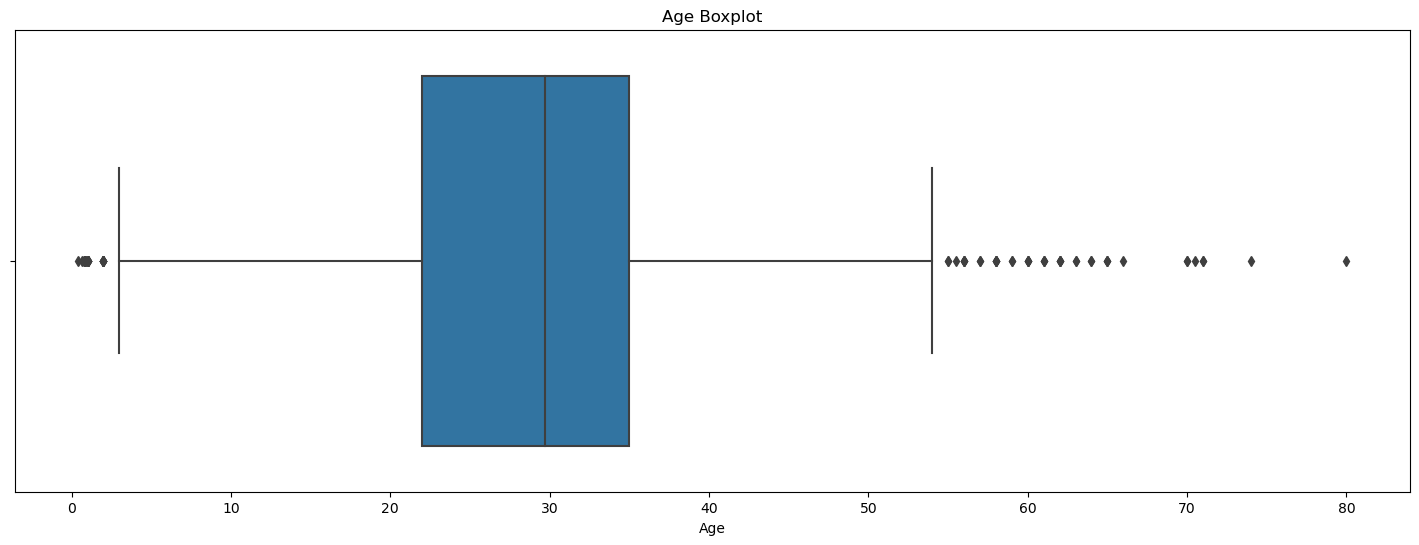

In [63]:
plt.figure(figsize=(18,6))
sns.boxplot(df['Age']).set(title= 'Age Boxplot')
plt.show()

#### Observation : Outliers are present in the dataset for Age

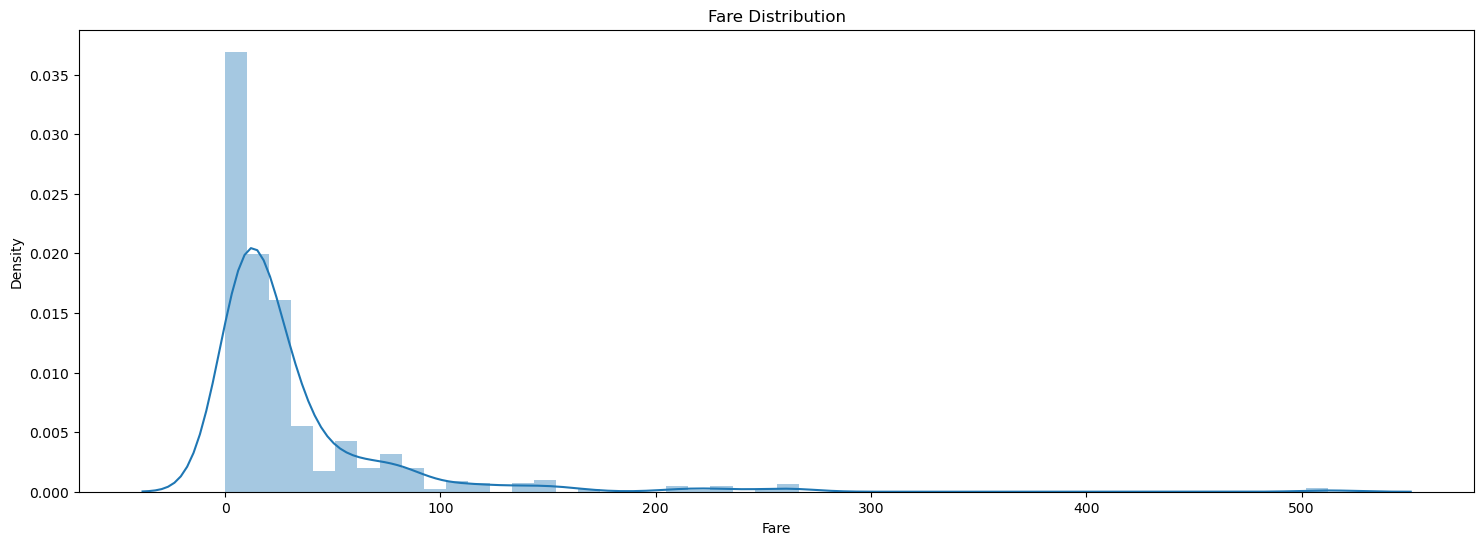

In [62]:
plt.figure(figsize=(18,6))
sns.distplot(df['Fare']).set(title = 'Fare Distribution')
plt.show()

#### Observation : Fare Distribution is skewd to right with extreame outliers

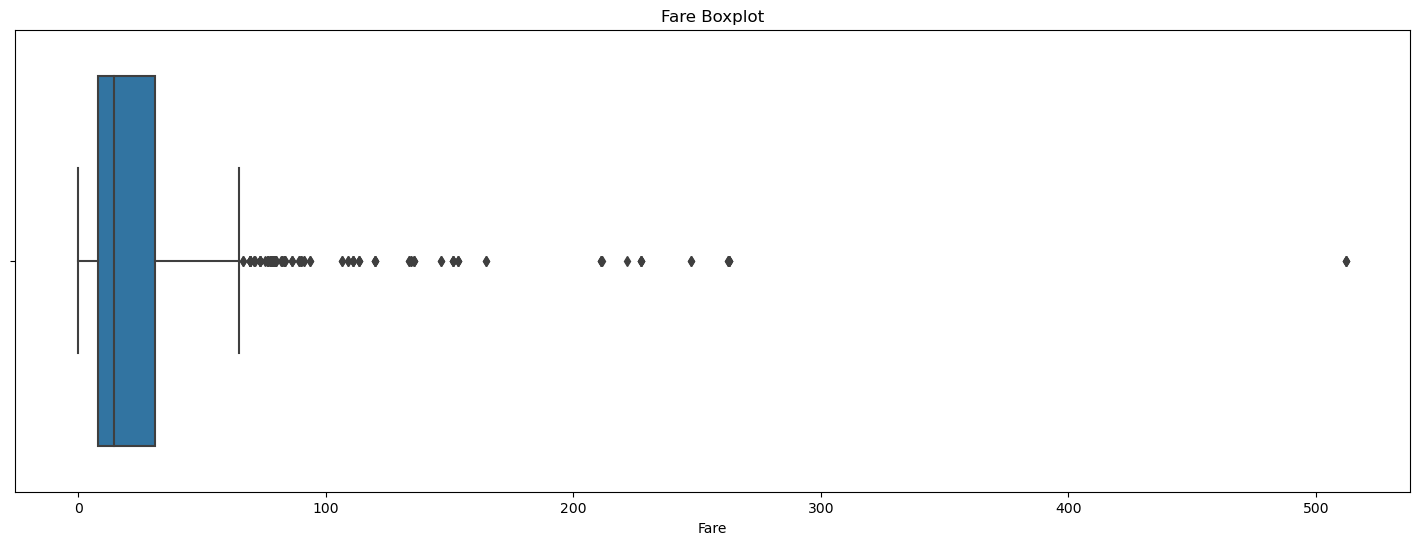

In [61]:
plt.figure(figsize=(18,6))
sns.boxplot(df['Fare']).set(title= 'Fare Boxplot')
plt.show()

## Multivariate Analysis

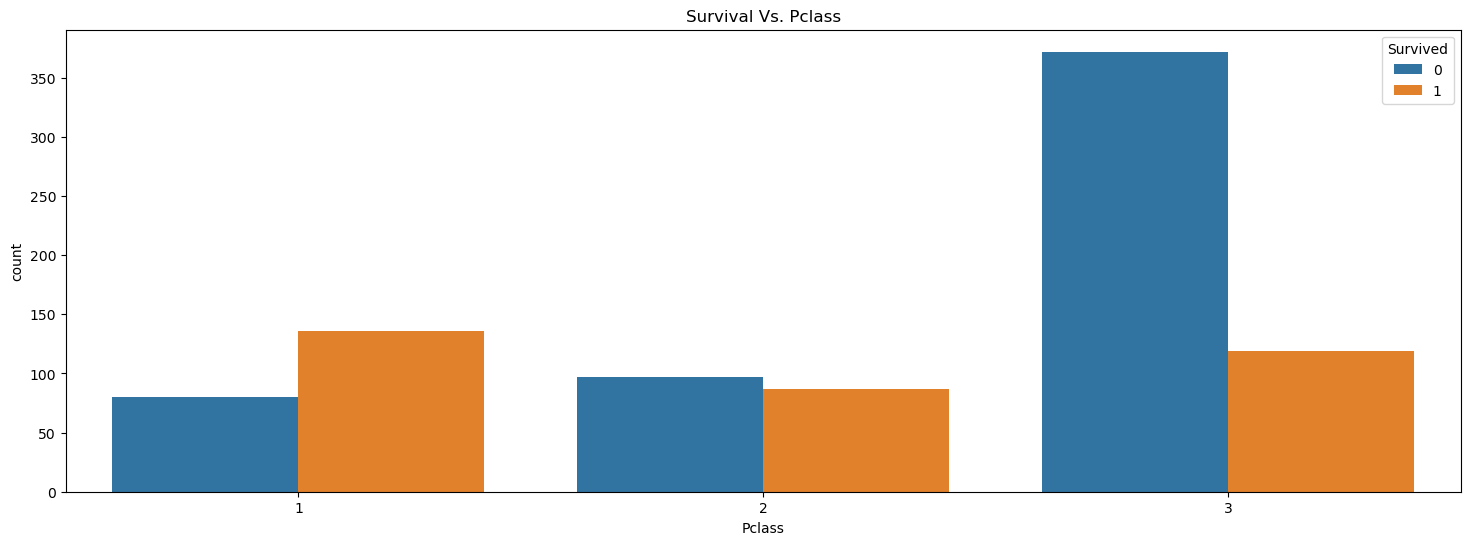

In [71]:
plt.figure(figsize=(18,6))
sns.countplot(df['Pclass'], hue = df['Survived']).set(title = 'Survival Vs. Pclass')
plt.show()

#### Observation : Survival rate of class 3 passenger is very low, Class 2 is 50% and for class 1 it is higher side

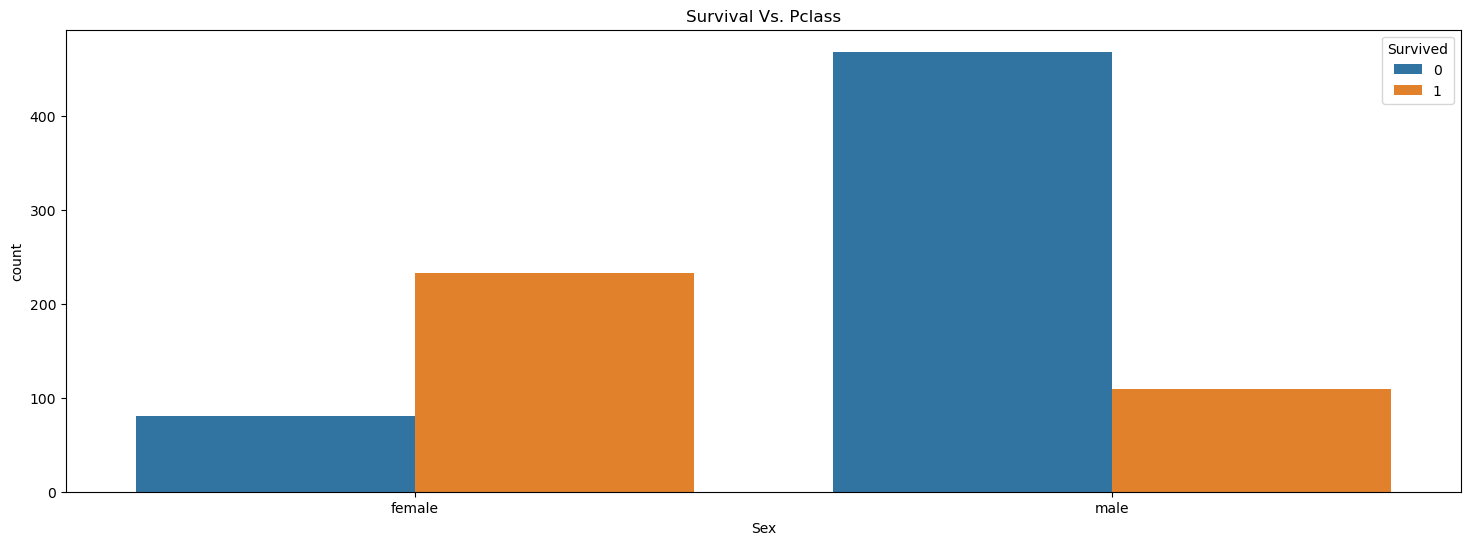

In [72]:
plt.figure(figsize=(18,6))
sns.countplot(df['Sex'], hue = df['Survived']).set(title = 'Survival Vs. Pclass')
plt.show()

#### Observation : Surviour rate for Female passnger is higher than the Male Passenger

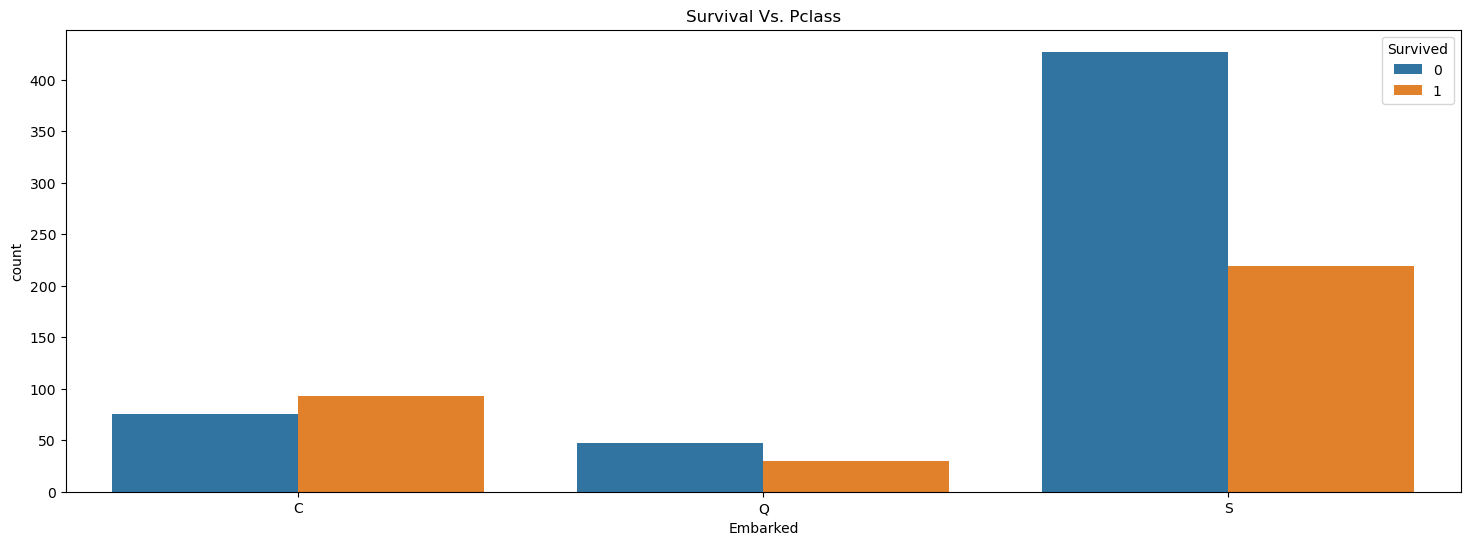

In [73]:
plt.figure(figsize=(18,6))
sns.countplot(df['Embarked'], hue = df['Survived']).set(title = 'Survival Vs. Pclass')
plt.show()

#### Observation : Somehow people desitned to C have more survival rate 

# Data Preprocessing

# 
    The columns SibSp and Parch are related to family size, lets create single column insted of those two

In [84]:
df['family_size'] = df['Parch']+df['SibSp']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


# 
    Lets now depending upon number of members in Family lets convert this to catgories Alone, Medium and Large family size

In [88]:
def family_type(number):
    if number==0:
        return 'Alone'
    elif number>0 and number <=4:
        return 'Medium'
    else:
        return 'Large'

In [89]:
df['Family_Type'] = df ['family_size'].apply(family_type)

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Family_Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Alone


In [91]:
#deleting the redundant columns
df.drop(columns = ['SibSp', 'Parch', 'family_size'], inplace = True)

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,Alone


In [93]:
pd.crosstab(df['Family_Type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis =1)

Survived,0,1
Family_Type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


#### People who are alone and Large have less chance of survival,  whereas the passenge with medium family have more chance of survival

## Outlier Detection and Handling

In [97]:
# Handling Outlier in Age
df=df[df['Age'] < (df['Age'].mean() + 3*df['Age'].std())]
df.shape

(768, 10)

In [98]:
# Handling Outlier in Fare

Q1 = np.percentile(df['Fare'], 25)
Q3 = np.percentile(df['Fare'], 75)

outlier_low = Q1 - 1.5*(Q3-Q1)
outlier_high = Q3 + 1.5*(Q3-Q1)

df = df [(df['Fare'] > outlier_low) & (df['Fare'] < outlier_high)]

In [99]:
df.shape

(743, 10)

### One hot encoding 
    To covert Categorical Data in Numeric form for better understanding

In [100]:
pd.get_dummies(data=df, columns = ['Pclass', 'Sex', 'Embarked', 'Family_Type'])

df = pd.get_dummies(data=df, columns = ['Pclass', 'Sex', 'Embarked', 'Family_Type'])

In [101]:
df.drop(columns = ['Pclass_1', 'Sex_female', 'Embarked_C', 'Family_Type_Alone'], inplace = True)

In [102]:
df

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Type_Large,Family_Type_Medium
0,1,0,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35.000000,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29.699118,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19.000000,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26.000000,111369,30.0000,0,0,1,0,0,0,0


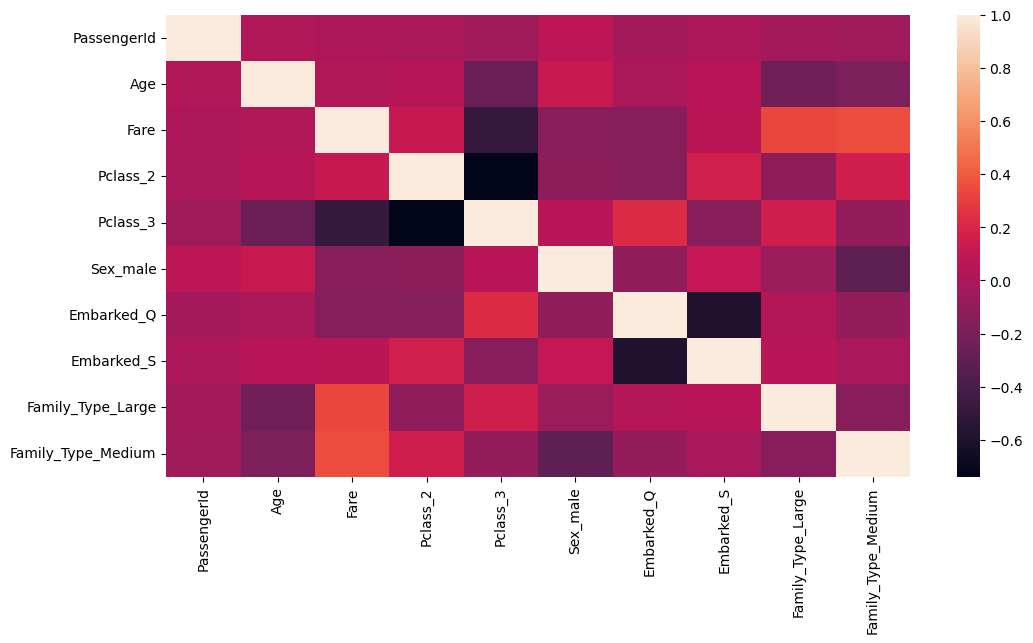

In [104]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [105]:
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Type_Large,Family_Type_Medium
0,1,0,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35.000000,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29.699118,330877,8.4583,0,1,1,1,0,0,0


### The features like PassengerId, Name, Ticket are not so useful for machine learning prediction, hence we can drop them 

In [106]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace =True)

In [107]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Type_Large,Family_Type_Medium
0,0,22.000000,7.2500,0,1,1,0,1,0,1
2,1,26.000000,7.9250,0,1,0,0,1,0,0
3,1,35.000000,53.1000,0,0,0,0,1,0,1
4,0,35.000000,8.0500,0,1,1,0,1,0,0
5,0,29.699118,8.4583,0,1,1,1,0,0,0


# Test Train Split

In [109]:
X = df[['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Family_Type_Large', 'Family_Type_Medium']]
y = df['Survived']

# Data Modelling

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr = LogisticRegression()

In [114]:
lr.fit(X_train, y_train)

LogisticRegression()

###  Prediction

In [115]:
predict = lr.predict(X_test)

### Testing

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Predicted No', 'Predicted yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted yes
Actual No,149,19
Actual Yes,26,52


In [118]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.73      0.67      0.70        78

    accuracy                           0.82       246
   macro avg       0.79      0.78      0.78       246
weighted avg       0.81      0.82      0.81       246

